<a href="https://colab.research.google.com/github/agarwalsoham993/ULTIMATE4/blob/soham/Skin_cancer_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data  = pd.read_csv("/content/drive/MyDrive/kdag_intra.csv")
data.head()

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [ ]:
data.columns

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

# metadata categorization

In [6]:
target = ['target','iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5','mel_mitotic_index','mel_thick_mm']
patient = ['age_approx','sex']
tbp_basic = ['isic_id','tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
                  'tbp_lv_perimeterMM','tbp_lv_color_std_mean','tbp_lv_radial_color_std_max',
                  'clin_size_long_diam_mm','tbp_lv_norm_border','tbp_lv_norm_color']
tbp_extra =['tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
            'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
            'tbp_lv_Lext', 'tbp_lv_deltaA', 'tbp_lv_deltaB','tbp_lv_deltaL',
            'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm','tbp_lv_eccentricity',
            'tbp_lv_minorAxisMM','tbp_lv_stdL', 'tbp_lv_stdLExt',
            'tbp_lv_symm_2axis','tbp_lv_symm_2axis_angle','tbp_lv_x', 'tbp_lv_y','tbp_lv_z']
to_keep = ["target"]+patient+tbp_basic+tbp_extra

## target encoding

In [12]:
from sklearn.preprocessing import OneHotEncoder

target_data = data[["target","isic_id"]]

ohe = OneHotEncoder()
iddx_full = pd.DataFrame(ohe.fit_transform(data[["iddx_full"]]).astype(int).toarray())
iddx_full.columns = ohe.get_feature_names_out()

target_data = pd.concat([target_data,iddx_full],axis=1)

In [13]:
target_data.to_csv("/content/drive/MyDrive/KDAG/kdag intras/target_data.csv",index=False)

In [14]:
pd.read_csv("/content/drive/MyDrive/KDAG/kdag intras/target_data.csv")

,target,isic_id,iddx_full_Benign,iddx_full_Benign::Benign adnexal epithelial proliferations - Apocrine or Eccrine::Hidradenoma,iddx_full_Benign::Benign adnexal epithelial proliferations - Follicular,iddx_full_Benign::Benign epidermal proliferations::Lichen planus like keratosis,iddx_full_Benign::Benign epidermal proliferations::Pigmented benign keratosis,iddx_full_Benign::Benign epidermal proliferations::Seborrheic keratosis,"iddx_full_Benign::Benign epidermal proliferations::Seborrheic keratosis::Seborrheic keratosis, Clonal",iddx_full_Benign::Benign epidermal proliferations::Solar lentigo,...,"iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Associated with a nevus","iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Nodular","iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, On chronically sun-exposed skin or lentigo maligna melanoma","iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma Invasive::Melanoma Invasive, Superficial spreading",iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ,"iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Lentigo maligna type","iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, Superficial spreading","iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma in situ::Melanoma in situ, associated with a nevus",iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma metastasis,"iddx_full_Malignant::Malignant melanocytic proliferations (Melanoma)::Melanoma, NOS"
0,0,ISIC_0015670,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,ISIC_0015845,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,ISIC_0015864,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,ISIC_0015902,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,ISIC_0024200,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,0,ISIC_9999937,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401055,0,ISIC_9999951,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401056,0,ISIC_9999960,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401057,0,ISIC_9999964,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## patient data encoding

In [16]:
data["sex"].fillna(data["sex"].mode()[0],inplace=True)
data["sex"] = data["sex"].map({"male":0 ,"female" : 1})
top_3_anatom_sites = data["anatom_site_general"].value_counts().index[:3].tolist()
data["anatom_site_general"] = data["anatom_site_general"].apply(lambda x: np.random.choice(top_3_anatom_sites) if pd.isna(x) else x)
data["age_approx"].fillna(data["age_approx"].median(),inplace=True)

In [17]:
data_balanced = data[to_keep]
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   target                       401059 non-null  int64  
 1   age_approx                   401059 non-null  float64
 2   sex                          401059 non-null  int64  
 3   isic_id                      401059 non-null  object 
 4   tbp_lv_areaMM2               401059 non-null  float64
 5   tbp_lv_area_perim_ratio      401059 non-null  float64
 6   tbp_lv_perimeterMM           401059 non-null  float64
 7   tbp_lv_color_std_mean        401059 non-null  float64
 8   tbp_lv_radial_color_std_max  401059 non-null  float64
 9   clin_size_long_diam_mm       401059 non-null  float64
 10  tbp_lv_norm_border           401059 non-null  float64
 11  tbp_lv_norm_color            401059 non-null  float64
 12  tbp_lv_A                     401059 non-null  float64
 13 

In [20]:
data_balanced.describe()

,target,age_approx,sex,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_perimeterMM,tbp_lv_color_std_mean,tbp_lv_radial_color_std_max,clin_size_long_diam_mm,tbp_lv_norm_border,...,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_minorAxisMM,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z
count,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000
mean,0.000980,58.026849,0.309171,8.539975,19.084517,11.878891,1.070408,1.016459,3.930827,3.451523,...,7.538922,0.741238,2.539773,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389
std,0.031288,13.549664,0.462153,9.679312,5.357863,5.919302,0.762918,0.734631,1.743068,1.724557,...,2.404951,0.143857,1.173169,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245
min,0.000000,5.000000,0.000000,0.431601,10.761634,2.579237,0.000000,0.000000,1.000000,0.589426,...,3.001138,0.027667,0.273973,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442
25%,0.000000,50.000000,0.000000,4.109589,15.426205,8.338364,0.574909,0.563891,2.840000,2.143836,...,5.748160,0.656627,1.812707,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647
50%,0.000000,60.000000,0.000000,5.685870,17.423950,10.015440,0.931402,0.902281,3.370000,2.996933,...,6.946320,0.768215,2.265201,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947
75%,0.000000,70.000000,1.000000,9.119910,21.011340,13.209100,1.412154,1.334523,4.380000,4.358399,...,8.748403,0.853175,2.905918,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567
max,1.000000,85.000000,1.000000,334.152700,87.205340,102.493900,9.952932,11.491140,28.400000,10.000000,...,30.487456,0.974960,18.387900,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000


In [21]:
data_to_be_scaled = data_balanced.drop(columns=["sex","isic_id","target"]).columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_balanced[data_to_be_scaled] = sc.fit_transform(data_balanced[data_to_be_scaled])

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
tbp_lv_location = pd.DataFrame(ohe.fit_transform(data[["tbp_lv_location"]]).astype(int).toarray())
tbp_lv_location.columns = ohe.get_feature_names_out()

In [23]:
ohe = OneHotEncoder()
anatom_site_general = pd.DataFrame(ohe.fit_transform(data[["anatom_site_general"]]).astype(int).toarray())
anatom_site_general.columns = ohe.get_feature_names_out()

In [24]:
ohe = OneHotEncoder()
attribution = pd.DataFrame(ohe.fit_transform(data[["attribution"]]).astype(int).toarray())
attribution.columns = ohe.get_feature_names_out()

In [25]:
data_balanced = pd.concat([data_balanced,tbp_lv_location,anatom_site_general,attribution],axis=1)
data_balanced.to_csv("/content/drive/MyDrive/KDAG/kdag intras/data_final_processed.csv",index = False)

In [38]:
categorical_columns = [attribution.columns]
categorical_columns.append(tbp_lv_location.columns)
categorical_columns.append(anatom_site_general.columns)

In [40]:
categorical_columns = [ 'attribution_ACEMID MIA',
                        'attribution_Department of Dermatology, Hospital Clínic de Barcelona',
                        'attribution_Department of Dermatology, University of Athens, Andreas Syggros Hospital of Skin and Venereal Diseases, Alexander Stratigos, Konstantinos Liopyris',
                        'attribution_Frazer Institute, The University of Queensland, Dermatology Research Centre',
                        'attribution_Memorial Sloan Kettering Cancer Center',
                        'attribution_University Hospital of Basel',
                        'attribution_ViDIR Group, Department of Dermatology, Medical University of Vienna'
                        'tbp_lv_location_Head & Neck', 'tbp_lv_location_Left Arm',
                        'tbp_lv_location_Left Arm - Lower', 'tbp_lv_location_Left Arm - Upper',
                        'tbp_lv_location_Left Leg', 'tbp_lv_location_Left Leg - Lower',
                        'tbp_lv_location_Left Leg - Upper', 'tbp_lv_location_Right Arm',
                        'tbp_lv_location_Right Arm - Lower',
                        'tbp_lv_location_Right Arm - Upper', 'tbp_lv_location_Right Leg',
                        'tbp_lv_location_Right Leg - Lower',
                        'tbp_lv_location_Right Leg - Upper', 'tbp_lv_location_Torso Back',
                        'tbp_lv_location_Torso Back Bottom Third',
                        'tbp_lv_location_Torso Back Middle Third',
                        'tbp_lv_location_Torso Back Top Third', 'tbp_lv_location_Torso Front',
                        'tbp_lv_location_Torso Front Bottom Half',
                        'tbp_lv_location_Torso Front Top Half', 'tbp_lv_location_Unknown'
                        'anatom_site_general_anterior torso', 'anatom_site_general_head/neck',
                        'anatom_site_general_lower extremity',
                        'anatom_site_general_posterior torso',
                        'anatom_site_general_upper extremity']

# Logistic regression

In [41]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [42]:
data_balanced = pd.read_csv("/content/drive/MyDrive/KDAG/kdag intras/data_final_processed.csv")

In [43]:
categorical_columns = [ 'attribution_ACEMID MIA',
                        'attribution_Department of Dermatology, Hospital Clínic de Barcelona',
                        'attribution_Department of Dermatology, University of Athens, Andreas Syggros Hospital of Skin and Venereal Diseases, Alexander Stratigos, Konstantinos Liopyris',
                        'attribution_Frazer Institute, The University of Queensland, Dermatology Research Centre',
                        'attribution_Memorial Sloan Kettering Cancer Center',
                        'attribution_University Hospital of Basel',
                        'attribution_ViDIR Group, Department of Dermatology, Medical University of Vienna'
                        'tbp_lv_location_Head & Neck', 'tbp_lv_location_Left Arm',
                        'tbp_lv_location_Left Arm - Lower', 'tbp_lv_location_Left Arm - Upper',
                        'tbp_lv_location_Left Leg', 'tbp_lv_location_Left Leg - Lower',
                        'tbp_lv_location_Left Leg - Upper', 'tbp_lv_location_Right Arm',
                        'tbp_lv_location_Right Arm - Lower',
                        'tbp_lv_location_Right Arm - Upper', 'tbp_lv_location_Right Leg',
                        'tbp_lv_location_Right Leg - Lower',
                        'tbp_lv_location_Right Leg - Upper', 'tbp_lv_location_Torso Back',
                        'tbp_lv_location_Torso Back Bottom Third',
                        'tbp_lv_location_Torso Back Middle Third',
                        'tbp_lv_location_Torso Back Top Third', 'tbp_lv_location_Torso Front',
                        'tbp_lv_location_Torso Front Bottom Half',
                        'tbp_lv_location_Torso Front Top Half', 'tbp_lv_location_Unknown'
                        'anatom_site_general_anterior torso', 'anatom_site_general_head/neck',
                        'anatom_site_general_lower extremity',
                        'anatom_site_general_posterior torso',
                        'anatom_site_general_upper extremity']

In [51]:
data_balanced.set_index('isic_id',inplace=True)

In [61]:
numerical_features = [col for col in X.columns if col not in categorical_columns]
categorical_features = categorical_columns

numerical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),
           ('scaler', StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features)],
    remainder='passthrough'
)
model_pipeline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', LogisticRegression(random_state=42, solver='liblinear'))]
)

In [70]:
df_minority = data_balanced[data_balanced["target"] == 1]
df_majority = data_balanced[data_balanced["target"] == 0]

## model training

### entire_data

In [62]:
X = data_balanced.drop('target', axis=1)
y = data_balanced['target']

Accuracy: 0.9990

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80133
           1       0.00      0.00      0.00        79

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



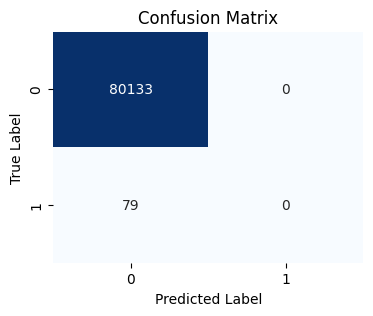

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:",class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### sample 1

In [53]:
df_random_majority = df_majority.sample(n=10000, random_state=42)
data_undersampled_1 = pd.concat([
    df_random_majority,
    df_minority
])

X = data_undersampled_1.drop('target', axis=1)
y = data_undersampled_1['target']

Accuracy: 0.9654

Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2000
           1       0.68      0.16      0.27        79

    accuracy                           0.97      2079
   macro avg       0.83      0.58      0.62      2079
weighted avg       0.96      0.97      0.96      2079



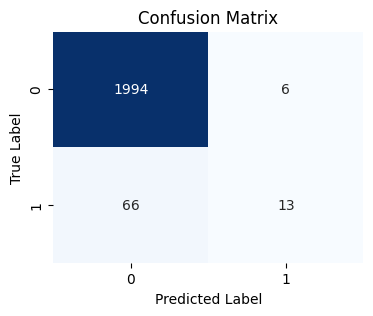

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:",class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### sample 2

In [67]:
# Stratified sampling
from sklearn.model_selection import train_test_split
df_majority_stratified = df_majority.sample(n=len(df_minority), random_state=42)

data_stratified = pd.concat([
    df_majority_stratified,
    df_minority
])

X = data_stratified.drop('target', axis=1)
y = data_stratified['target']

In [68]:
X.shape

(786, 67)

Accuracy: 0.8671

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.89      0.87        79
           1       0.88      0.85      0.86        79

    accuracy                           0.87       158
   macro avg       0.87      0.87      0.87       158
weighted avg       0.87      0.87      0.87       158



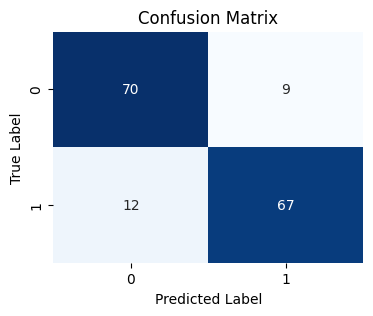

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### sampling 3

here we will resample the minority data for better results and take 10000 random points from the majority data

therefore here we also need to make sure only the training data gets the duplicates one

In [104]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X = data_balanced.drop('target', axis=1)
y = data_balanced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_major = X_train[y_train == 0]
X_train_minor = X_train[y_train == 1]
y_train_major = y_train[y_train == 0]
y_train_minor = y_train[y_train == 1]

X_train_minor_oversampled, y_train_minor_oversampled = resample(X_train_minor,y_train_minor,replace=True,n_samples=10000,random_state=42)

train_undersampled = pd.concat([X_train_major,y_train_major],axis=1).sample(n=10000, random_state=42)
X_train_major_undersampled = train_undersampled.drop('target', axis=1)
y_train_major_undersampled = train_undersampled['target']


X_train_resampled = pd.concat([X_train_minor_oversampled, X_train_major_undersampled])
y_train_resampled = pd.concat([y_train_minor_oversampled, y_train_major_undersampled])

Accuracy: 0.8598

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     80133
           1       0.01      0.82      0.01        79

    accuracy                           0.86     80212
   macro avg       0.50      0.84      0.47     80212
weighted avg       1.00      0.86      0.92     80212



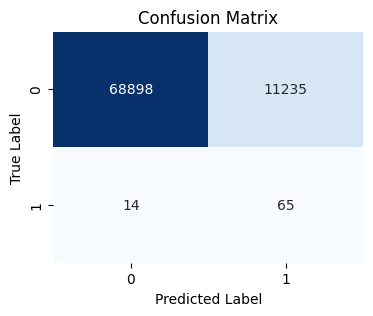

In [109]:
model_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 3x the undersampled data

In [110]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X = data_balanced.drop('target', axis=1)
y = data_balanced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_major = X_train[y_train == 0]
X_train_minor = X_train[y_train == 1]
y_train_major = y_train[y_train == 0]
y_train_minor = y_train[y_train == 1]

X_train_minor_oversampled, y_train_minor_oversampled = resample(X_train_minor,y_train_minor,replace=True,n_samples=3*(df_minority.shape[0]),random_state=42)

train_undersampled = pd.concat([X_train_major,y_train_major],axis=1).sample(n=10000, random_state=42)
X_train_major_undersampled = train_undersampled.drop('target', axis=1)
y_train_major_undersampled = train_undersampled['target']


X_train_resampled = pd.concat([X_train_minor_oversampled, X_train_major_undersampled])
y_train_resampled = pd.concat([y_train_minor_oversampled, y_train_major_undersampled])

Accuracy: 0.9812

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     80133
           1       0.02      0.41      0.04        79

    accuracy                           0.98     80212
   macro avg       0.51      0.69      0.52     80212
weighted avg       1.00      0.98      0.99     80212



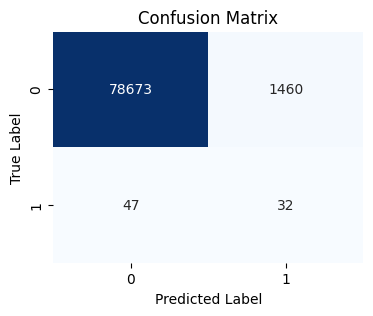

In [111]:
model_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# random forest classifier

In [112]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [117]:
numerical_features = [col for col in X.columns if col not in categorical_columns]
categorical_features = categorical_columns

numerical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')),
           ('scaler', StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_features)],
    remainder='passthrough'
)
model_pipeline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier',RandomForestClassifier(random_state=42, n_jobs=-1))]
)

## model_training

## without sampling

In [114]:
X = data_balanced.drop('target', axis=1)
y = data_balanced['target']

Accuracy: 0.9990

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80133
           1       0.00      0.00      0.00        79

    accuracy                           1.00     80212
   macro avg       0.50      0.50      0.50     80212
weighted avg       1.00      1.00      1.00     80212



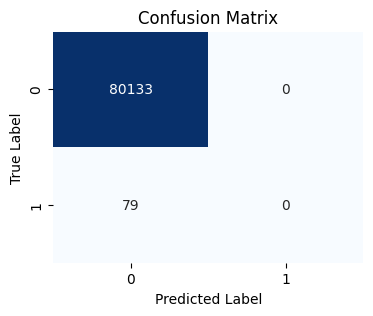

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:",class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## sample 1

In [118]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

X = data_balanced.drop('target', axis=1)
y = data_balanced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_major = X_train[y_train == 0]
X_train_minor = X_train[y_train == 1]
y_train_major = y_train[y_train == 0]
y_train_minor = y_train[y_train == 1]

X_train_minor_oversampled, y_train_minor_oversampled = resample(X_train_minor,y_train_minor,replace=True,n_samples=10000,random_state=42)

train_undersampled = pd.concat([X_train_major,y_train_major],axis=1).sample(n=10000, random_state=42)
X_train_major_undersampled = train_undersampled.drop('target', axis=1)
y_train_major_undersampled = train_undersampled['target']


X_train_resampled = pd.concat([X_train_minor_oversampled, X_train_major_undersampled])
y_train_resampled = pd.concat([y_train_minor_oversampled, y_train_major_undersampled])

Accuracy: 0.9945

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80133
           1       0.07      0.35      0.11        79

    accuracy                           0.99     80212
   macro avg       0.53      0.67      0.56     80212
weighted avg       1.00      0.99      1.00     80212



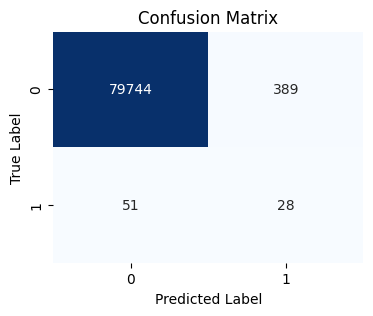

In [119]:
model_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## sample 2

In [120]:
# Stratified sampling
from sklearn.model_selection import train_test_split
df_majority_stratified = df_majority.sample(n=len(df_minority), random_state=42)

data_stratified = pd.concat([
    df_majority_stratified,
    df_minority
])

X = data_stratified.drop('target', axis=1)
y = data_stratified['target']

Accuracy: 0.8987

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.91      0.90        79
           1       0.91      0.89      0.90        79

    accuracy                           0.90       158
   macro avg       0.90      0.90      0.90       158
weighted avg       0.90      0.90      0.90       158



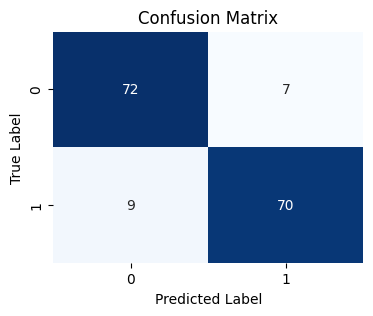

In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:",class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8741

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     80133
           1       0.01      0.97      0.02        79

    accuracy                           0.87     80212
   macro avg       0.50      0.92      0.47     80212
weighted avg       1.00      0.87      0.93     80212



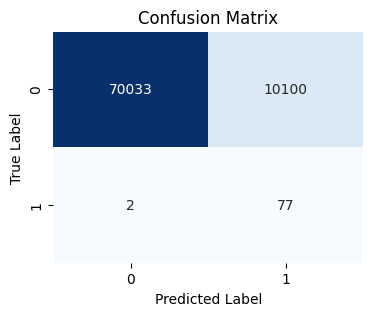

In [122]:
X = data_balanced.drop('target', axis=1)
y = data_balanced['target']
_, X_test, _1, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
y_pred = model_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Undersampling

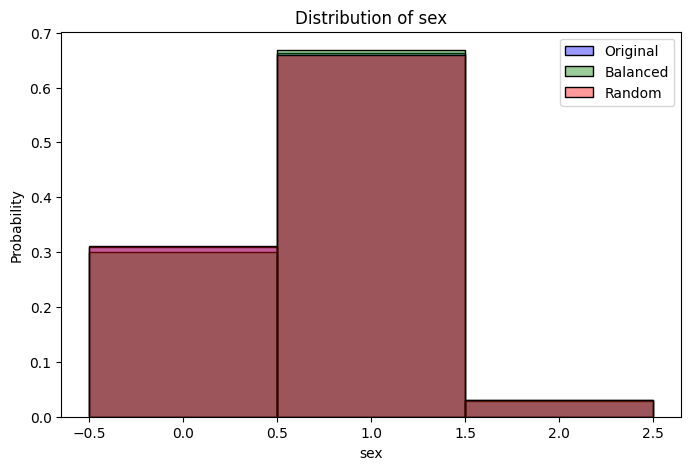

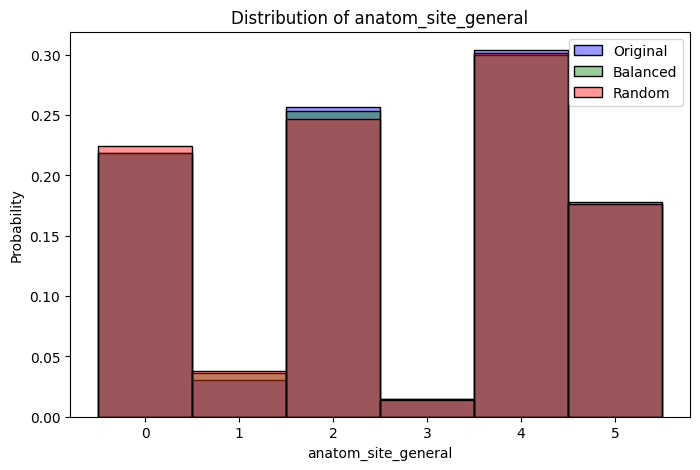

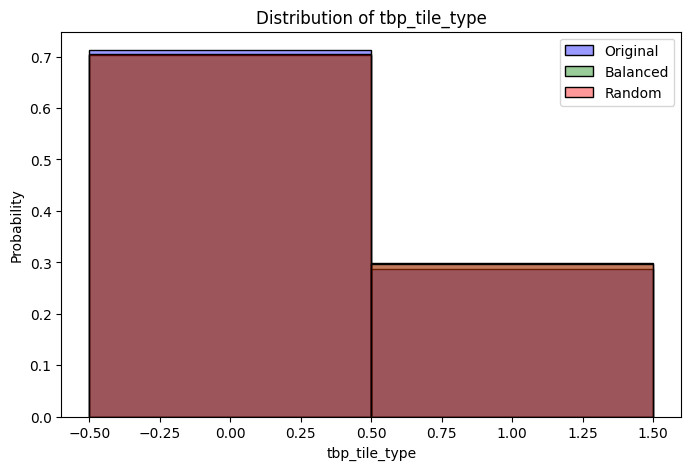

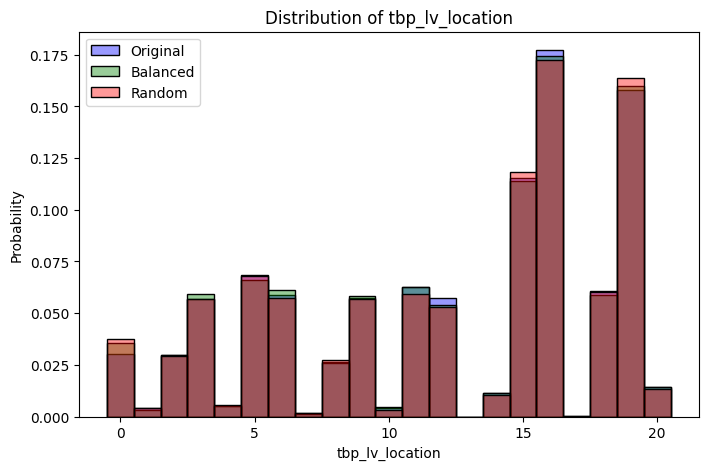

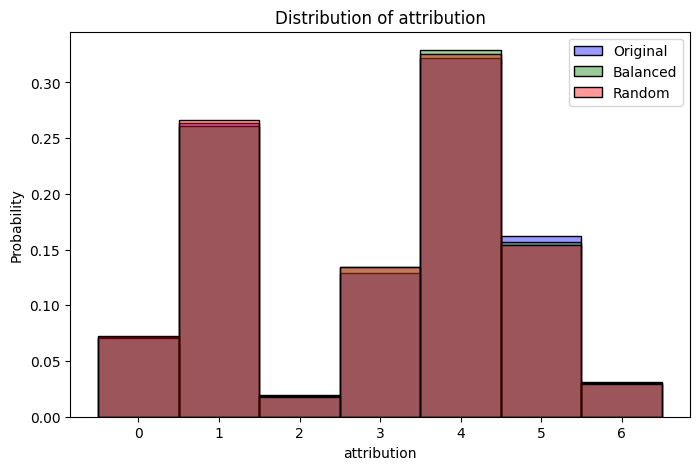

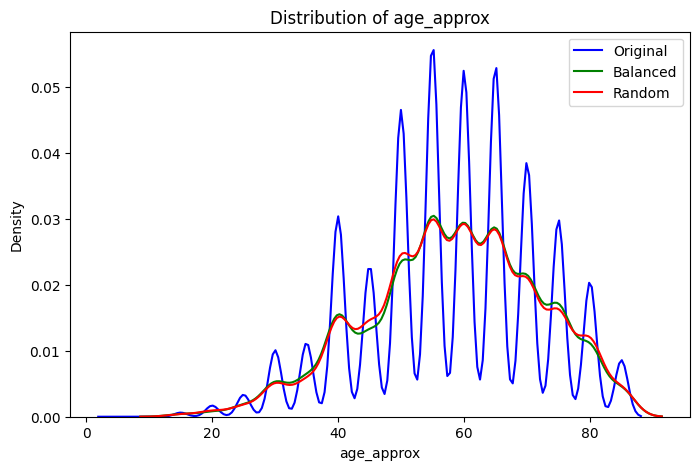

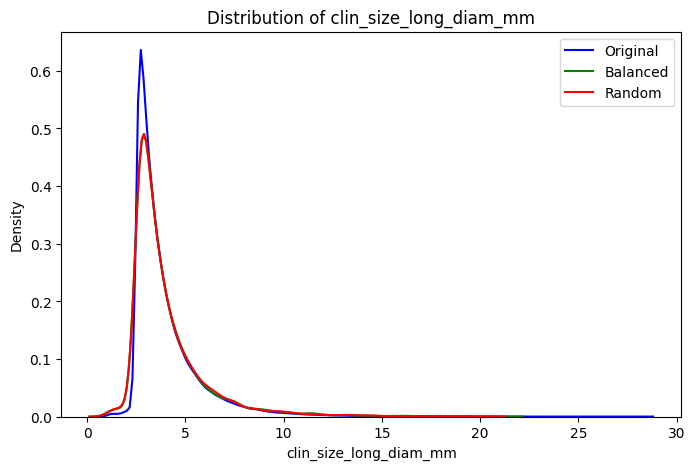

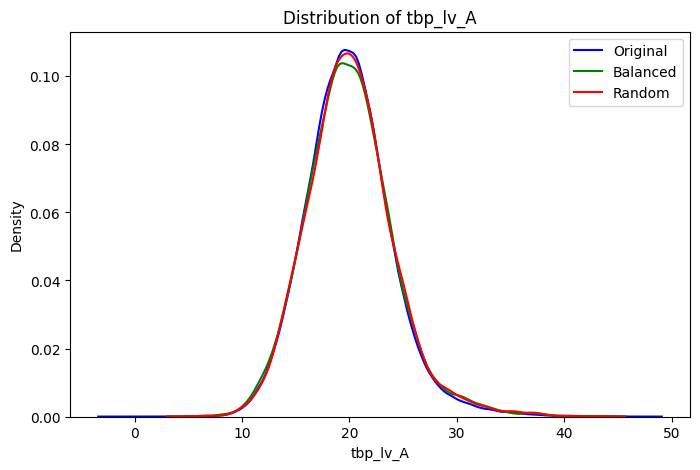

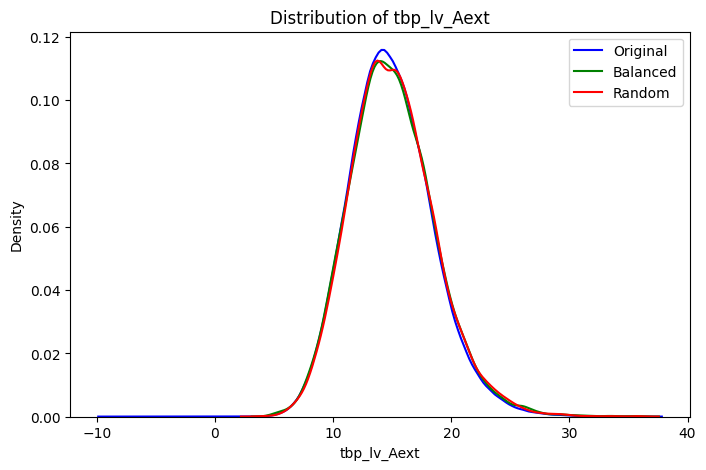

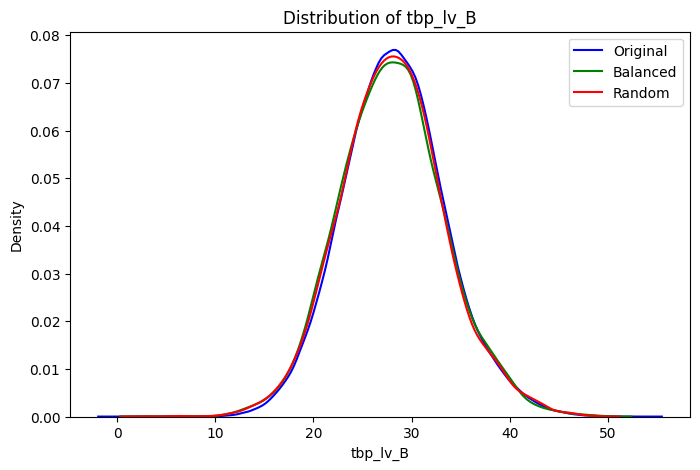

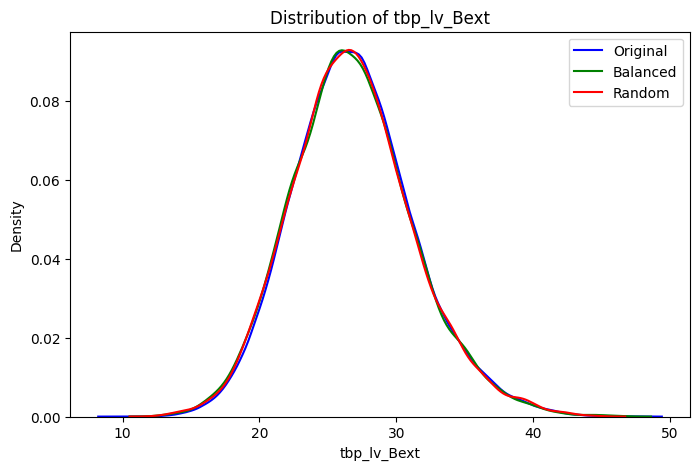

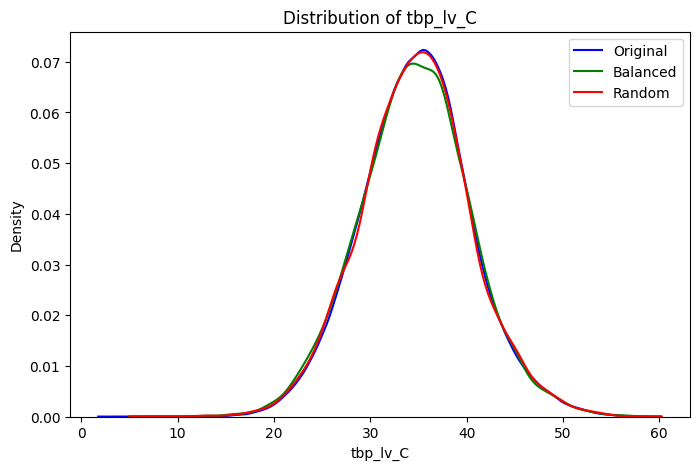

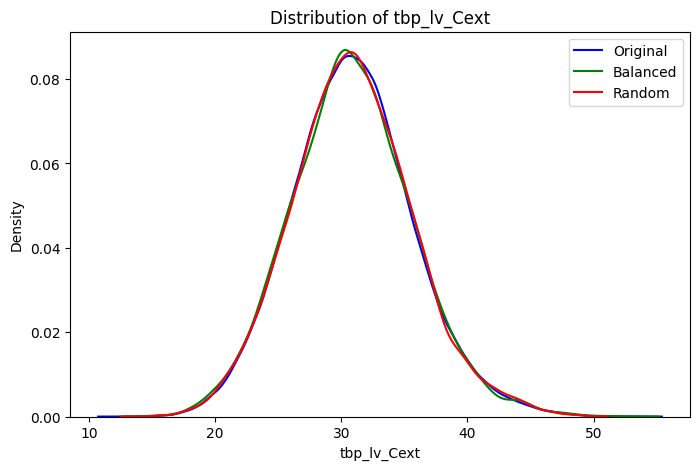

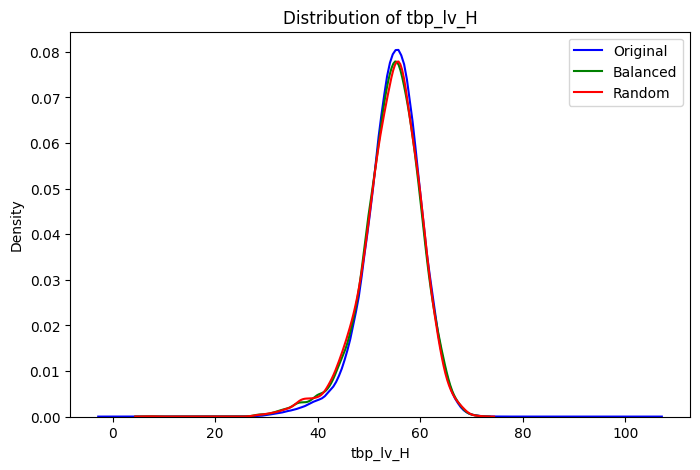

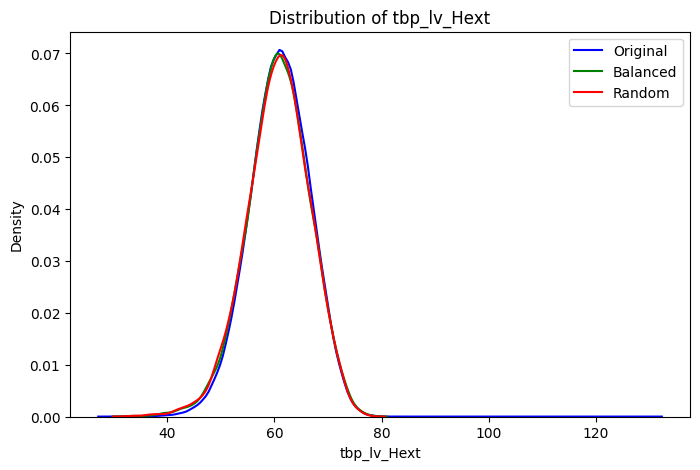

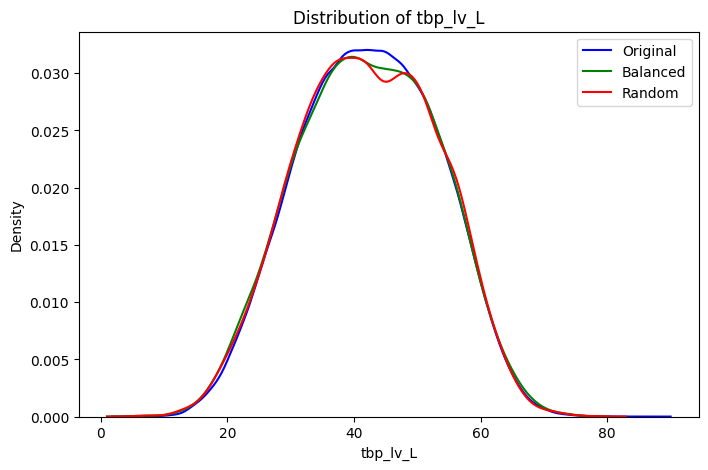

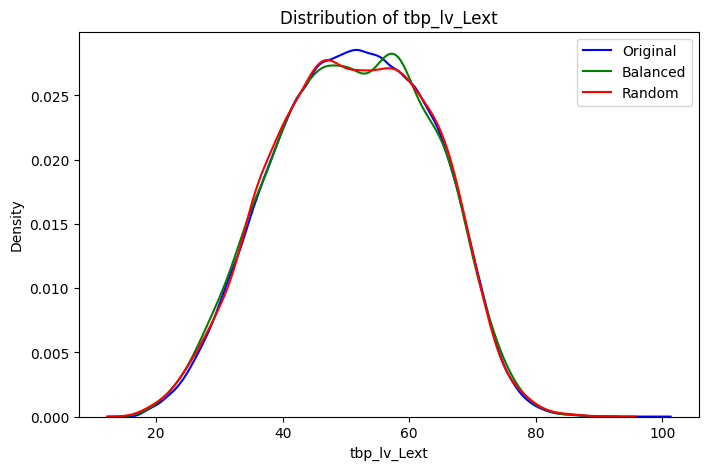

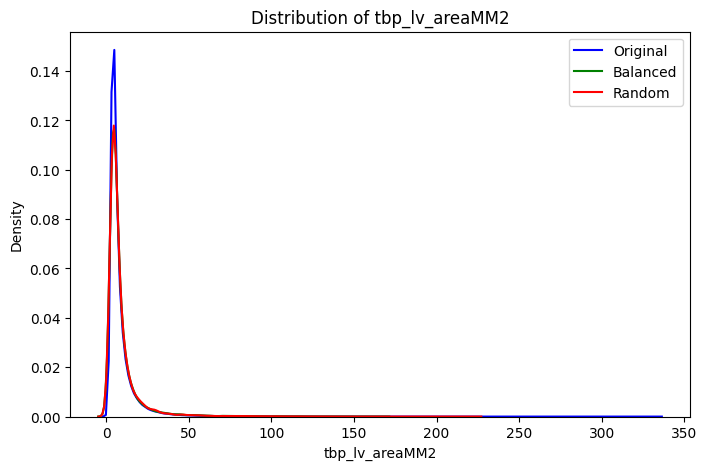

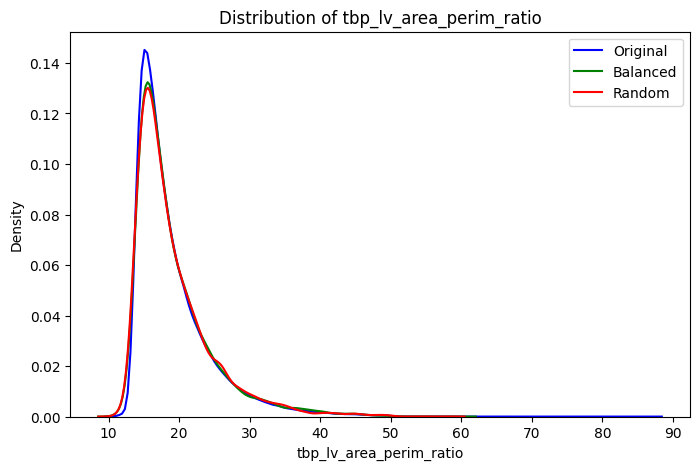

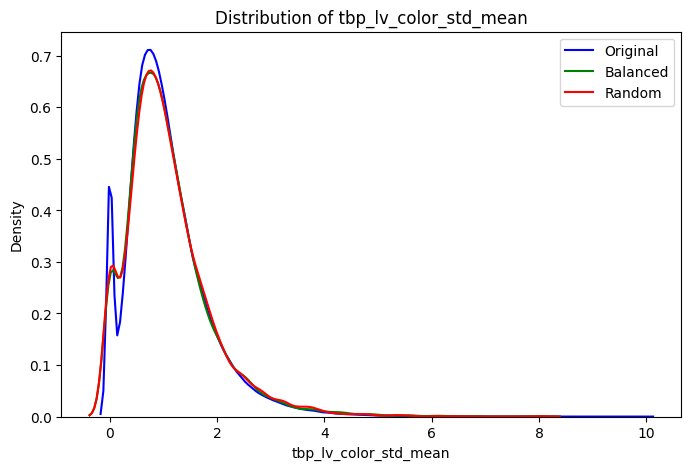

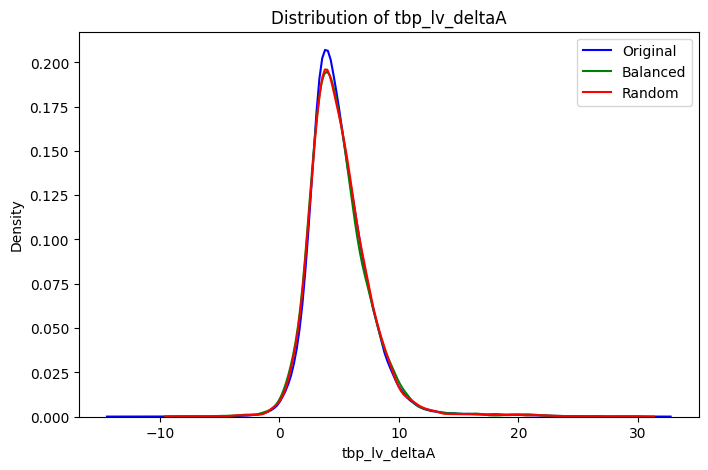

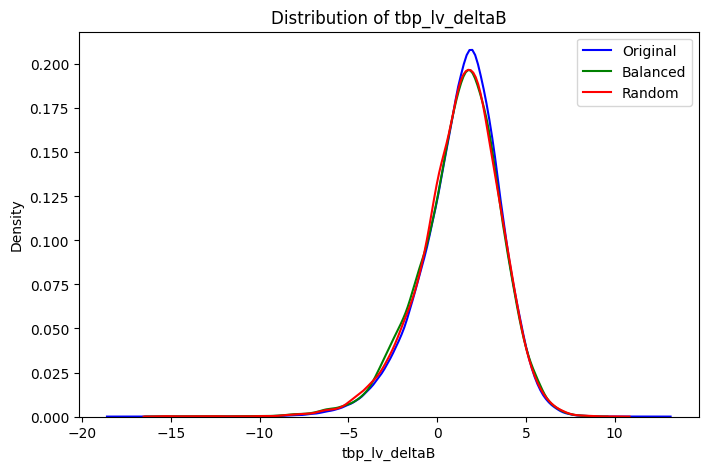

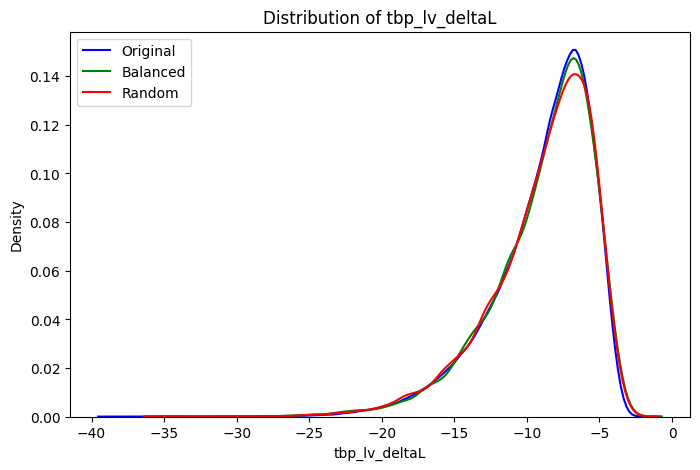

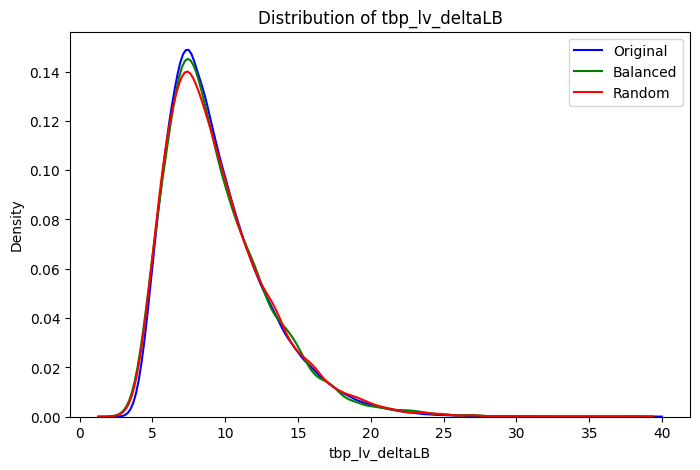

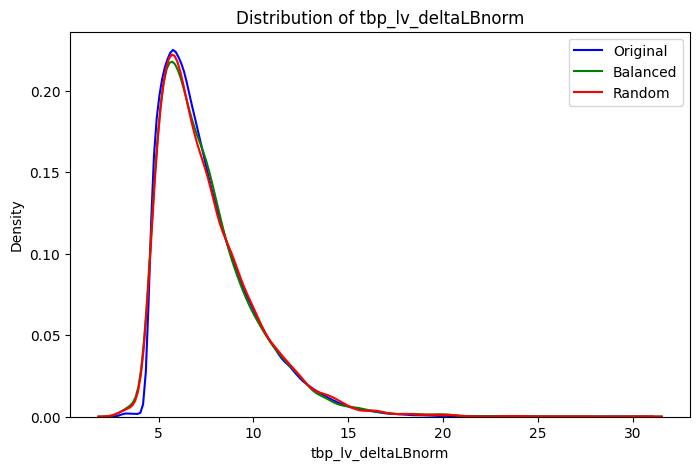

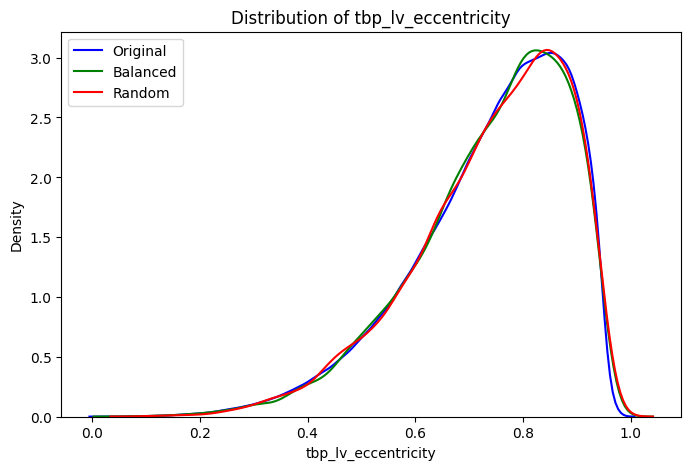

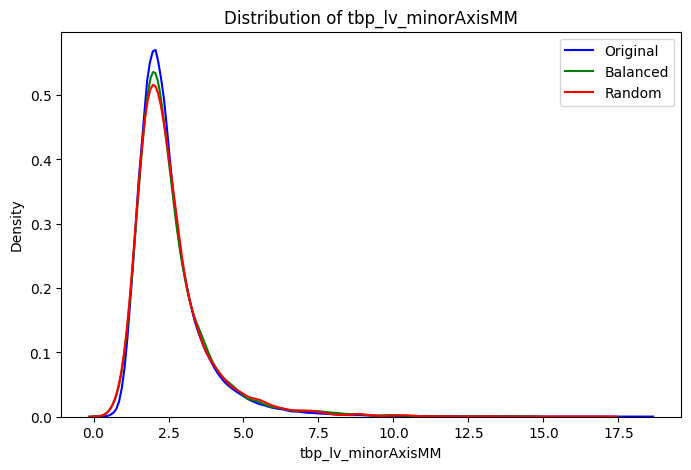

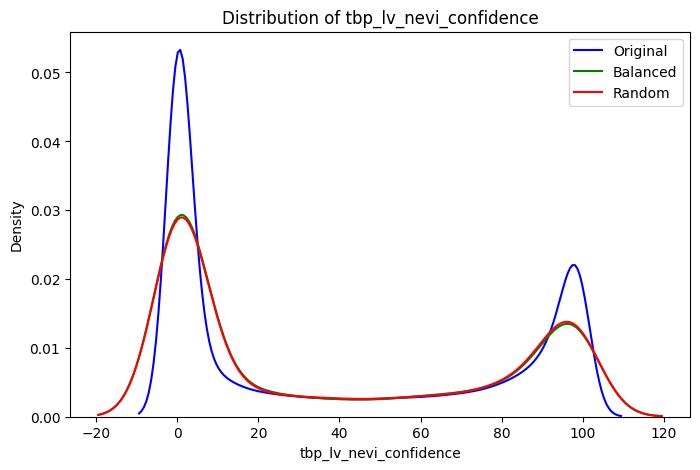

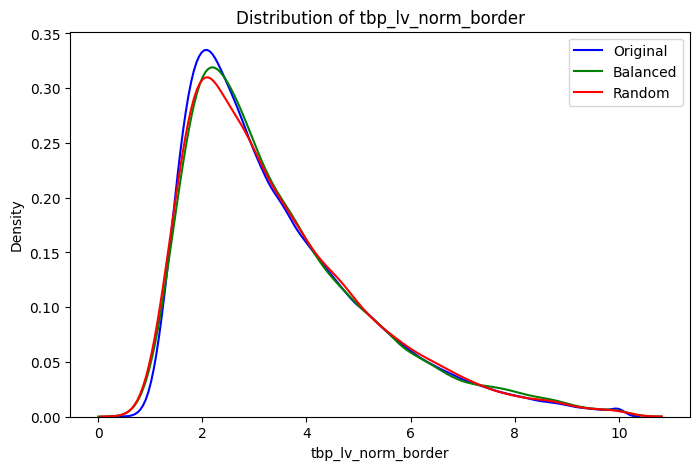

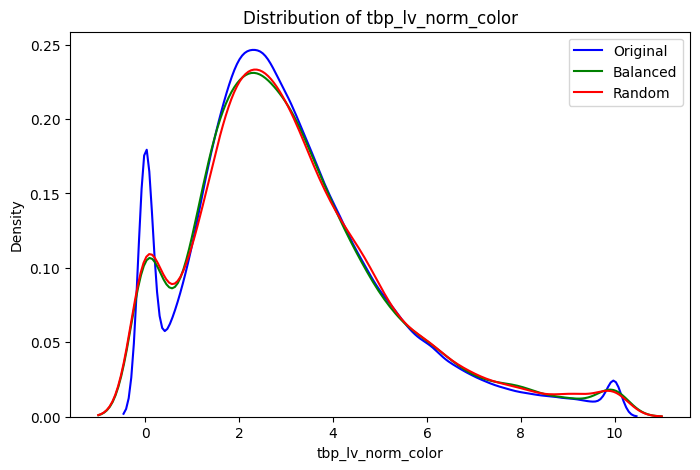

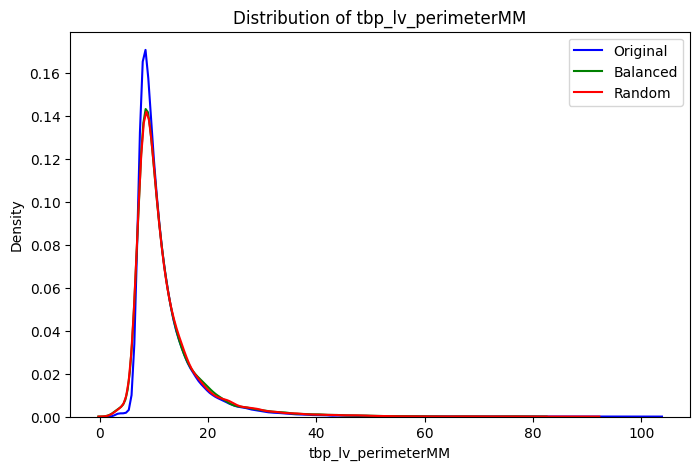

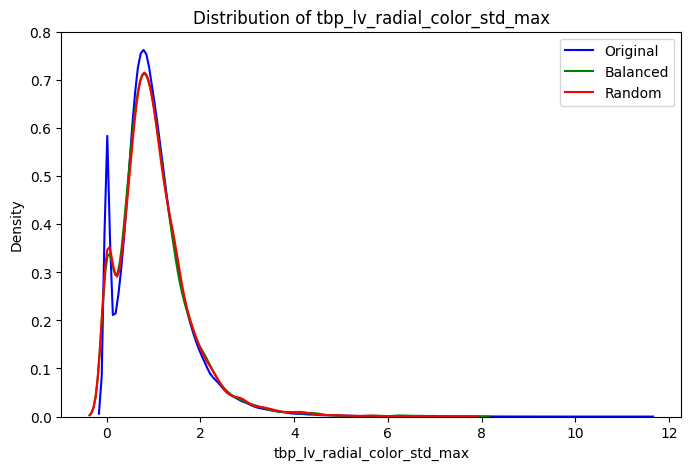

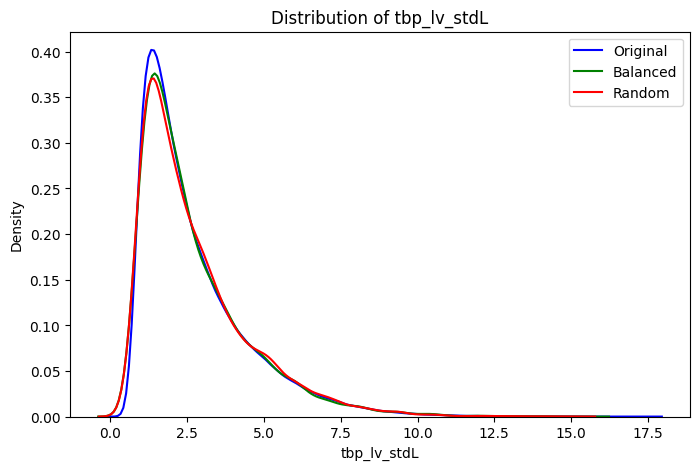

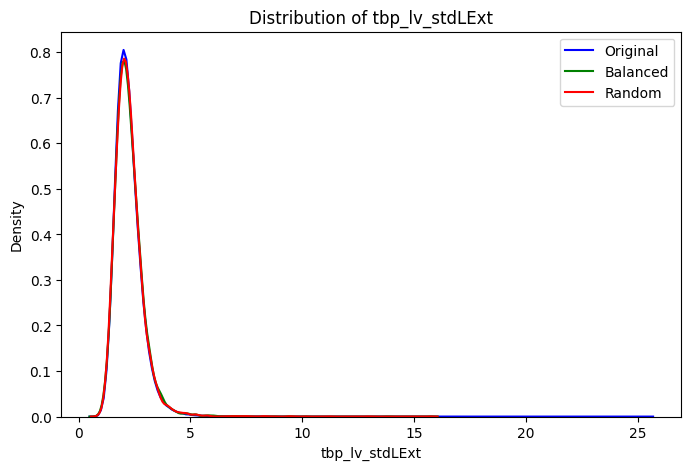

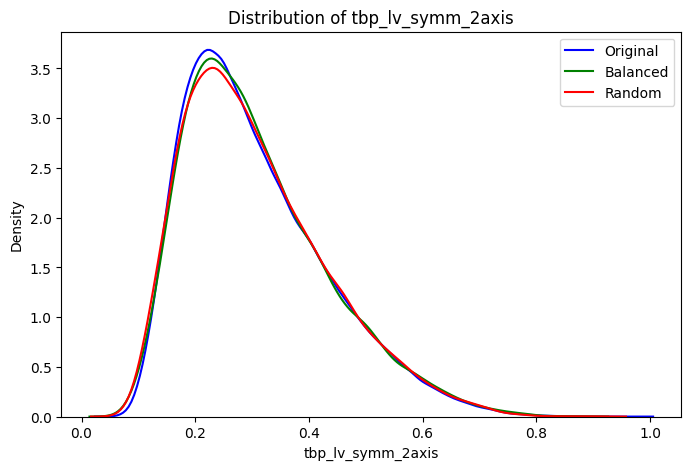

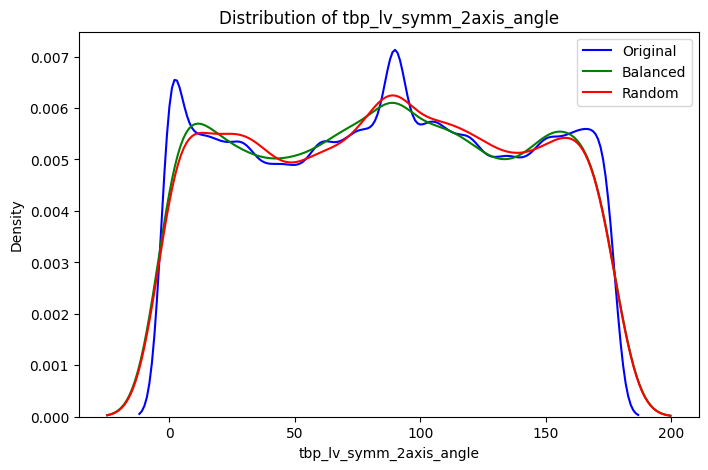

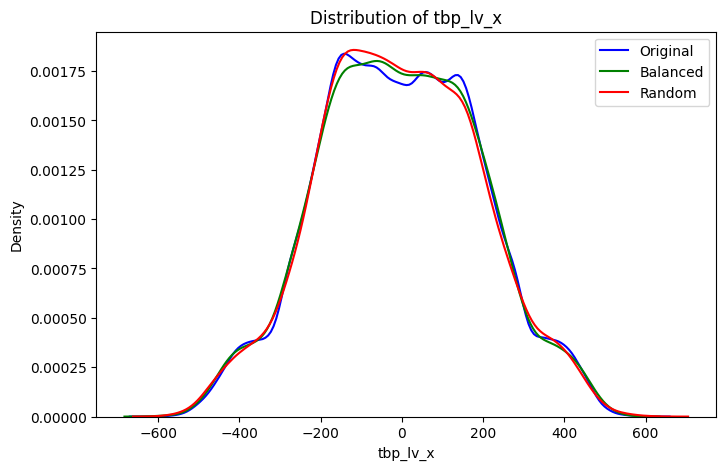

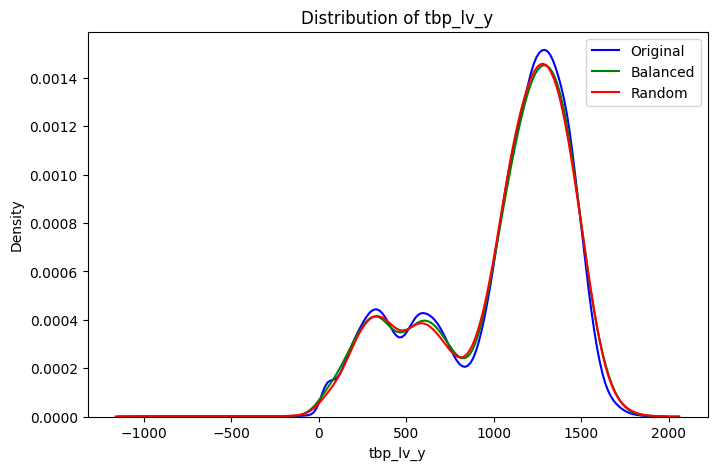

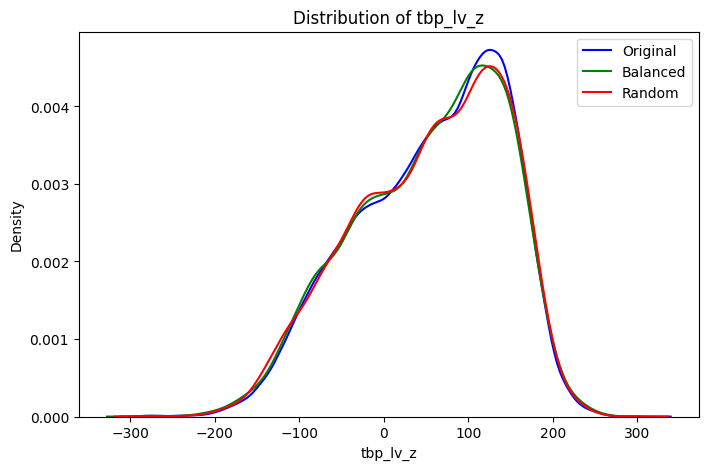

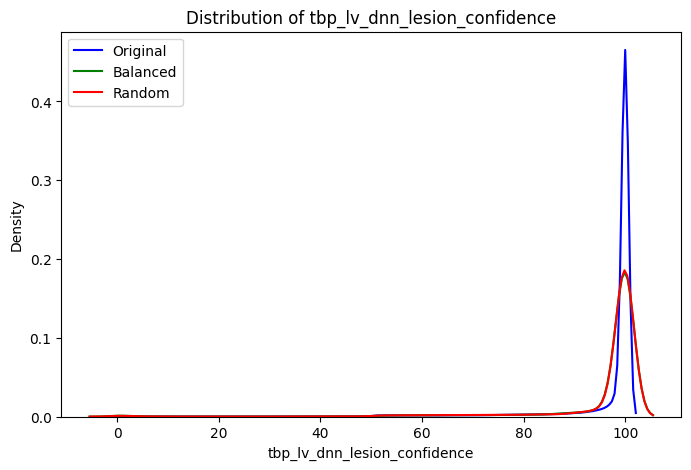

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("subject_data.csv")

# Define columns
cat_cols = ['sex', 'anatom_site_general', 'tbp_tile_type', 'tbp_lv_location', 'attribution']
ignore_cols = [
    'patient_id','lesion_id','iddx_full','iddx_1','iddx_2','iddx_3',
    'iddx_4','iddx_5','mel_mitotic_index','mel_thick_mm','bp_lv_location_simple'
]
target_col = 'target'

# Fill missing in categorical cols with string
for col in cat_cols:
    df[col] = df[col].fillna("missing")

# Encode categorical columns with LabelEncoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Identify numerical columns
numerical_cols = [
    col for col in df.columns
    if col not in cat_cols + ignore_cols + [target_col, 'isic_id']
    and pd.api.types.is_numeric_dtype(df[col])
]

# Separate majority/minority
df_minority = df[df[target_col] == 1]
df_majority = df[df[target_col] == 0]

# Impute missing values for majority class before clustering
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_majority_num = pd.DataFrame(
    num_imputer.fit_transform(df_majority[numerical_cols]),
    columns=numerical_cols,
    index=df_majority.index
)
X_majority_cat = pd.DataFrame(
    cat_imputer.fit_transform(df_majority[cat_cols]),
    columns=cat_cols,
    index=df_majority.index
)

X_majority_imputed = pd.concat([X_majority_num, X_majority_cat], axis=1)

# Clustering-based undersampling
k = 100
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_majority['cluster'] = kmeans.fit_predict(X_majority_imputed)

samples_per_cluster = (df_majority['cluster'].value_counts(normalize=True) * 10000).round().astype(int)
sampled_majority = pd.concat([
    df_majority[df_majority['cluster'] == c].sample(
        n=min(samples_per_cluster[c], len(df_majority[df_majority['cluster'] == c])),
        random_state=42
    )
    for c in samples_per_cluster.index
])

# Balanced dataset
df_balanced = pd.concat([
    sampled_majority.drop(columns=['cluster']),
    df_minority
])

# Random undersample
df_random_majority = df_majority.drop(columns=['cluster']).sample(n=10000, random_state=42)
df_random = pd.concat([
    df_random_majority,
    df_minority
])

# Ensure same columns
df_balanced = df_balanced[df.columns]
df_random = df_random[df.columns]

# Plotting functions
def plot_cat_distribution(col):
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], color='blue', alpha=0.4, stat="probability", discrete=True, label='Original')
    sns.histplot(df_balanced[col], color='green', alpha=0.4, stat="probability", discrete=True, label='Balanced')
    sns.histplot(df_random[col], color='red', alpha=0.4, stat="probability", discrete=True, label='Random')
    plt.legend()
    plt.title(f'Distribution of {col}')
    plt.show()

def plot_num_distribution(col):
    plt.figure(figsize=(8,5))
    sns.kdeplot(df[col], label='Original', color='blue')
    sns.kdeplot(df_balanced[col], label='Balanced', color='green')
    sns.kdeplot(df_random[col], label='Random', color='red')
    plt.legend()
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot all categorical columns
for ccol in cat_cols:
    plot_cat_distribution(ccol)

# Plot all numerical columns
for ncol in numerical_cols:
    plot_num_distribution(ncol)


In [ ]:
df_balanced.columns


Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [ ]:
df_balanced.drop(columns=["image_type","patient_id","iddx_full","iddx_1","iddx_2","iddx_3","iddx_4","iddx_5","mel_mitotic_index","mel_thick_mm","copyright_license","tbp_lv_dnn_lesion_confidence"],inplace=True)

In [ ]:
df_balanced.drop(columns=["image_type","patient_id","iddx_full","iddx_1","iddx_2","iddx_3","iddx_4","iddx_5","mel_mitotic_index","mel_thick_mm","copyright_license","tbp_lv_dnn_lesion_confidence"],inplace=True)

In [ ]:
df_balanced.to_csv("df_balanced_kmeans", index=False)

In [ ]:
df_balanced.shape

(10391, 43)

In [ ]:
# Plotting distributions for cat and num columns on same plot for original, balanced, random

def plot_cat_comparison(col):
    orig_counts = df[col].value_counts(normalize=True).sort_index()
    strat_counts = df_balanced[col].value_counts(normalize=True).reindex(orig_counts.index, fill_value=0)
    random_counts = df_random[col].value_counts(normalize=True).reindex(orig_counts.index, fill_value=0)

    comp_df = pd.DataFrame({
        'Original': orig_counts,
        'Stratified': strat_counts,
        'Random': random_counts
    })

    comp_df.plot(kind='bar', figsize=(8,4))
    plt.title(f'Distribution Comparison for {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

def plot_num_distribution(col):
    plt.figure(figsize=(8,5))
    sns.kdeplot(df[col], label='Original', color='blue')
    sns.kdeplot(df_balanced[col], label='Balanced', color='green')
    sns.kdeplot(df_random[col], label='Random', color='red')
    plt.legend()
    plt.title(f'Distribution of {col}')
    plt.show()

for ccol in cat_cols:
    plot_cat_comparison(ccol)

for ncol in numerical_cols:
    plot_num_distribution(ncol)

In [ ]:
def area_overlap_hist(original, sample, bins=50):
    # Convert to numeric, coerce errors to NaN
    orig = pd.to_numeric(original, errors='coerce').dropna()
    samp = pd.to_numeric(sample, errors='coerce').dropna()

    if len(orig) == 0 or len(samp) == 0:
        return np.nan  # no valid data

    combined = pd.concat([orig, samp])
    counts_orig, bin_edges = np.histogram(orig, bins=bins, range=(combined.min(), combined.max()), density=True)
    counts_samp, _ = np.histogram(samp, bins=bin_edges, density=True)

    bin_width = bin_edges[1] - bin_edges[0]
    overlap = np.sum(np.minimum(counts_orig, counts_samp)) * bin_width

    return overlap * 100


def cat_dist_similarity(original, sample):
    """Calculate distribution similarity between categorical columns (1 - total variation distance)."""
    orig_counts = original.value_counts(normalize=True)
    samp_counts = sample.value_counts(normalize=True).reindex(orig_counts.index, fill_value=0)

    tvd = 0.5 * np.sum(np.abs(orig_counts - samp_counts))
    similarity = 1 - tvd
    return similarity * 100

# Lists of columns
num_cols = [c for c in df.columns if c not in cat_cols + ["isic_id", "target"]]
cat_cols = ["sex", "anatom_site_general", "tbp_tile_type", "tbp_lv_location", "attribution"]

# Calculate overlap for numerical columns
overlap_num = {}
for col in num_cols:
    overlap_balanced = area_overlap_hist(df[col], df_balanced[col])
    overlap_random = area_overlap_hist(df[col], df_random[col])
    overlap_num[col] = {"Balanced": overlap_balanced, "Random": overlap_random}

overlap_num = pd.DataFrame(overlap_num).T

# Calculate similarity for categorical columns
overlap_cat = {}
for col in cat_cols:
    sim_balanced = cat_dist_similarity(df[col], df_balanced[col])
    sim_random = cat_dist_similarity(df[col], df_random[col])
    overlap_cat[col] = {"Balanced": sim_balanced, "Random": sim_random}

overlap_cat = pd.DataFrame(overlap_cat).T

# Find features where Balanced > Random
better_num = overlap_num[overlap_num["Balanced"] > overlap_num["Random"]].index.tolist()
better_cat = overlap_cat[overlap_cat["Balanced"] > overlap_cat["Random"]].index.tolist()

print("Numerical features better in balanced sampling:")
print(better_num)

print("\nCategorical features better in balanced sampling:")
print(better_cat)
